In [1]:
#Libraries Calling
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data_0 = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
data_0.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
data_0.shape

(299, 13)

In [5]:
data_0.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
data_0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = data_0[(data_0["DEATH_EVENT"]==0) & (data_0["sex"]==1)]
d2 = data_0[(data_0["DEATH_EVENT"]==1) & (data_0["sex"]==1)]
d3 = data_0[(data_0["DEATH_EVENT"]==0) & (data_0["sex"]==0)]
d4 = data_0[(data_0["DEATH_EVENT"]==1) & (data_0["sex"]==0)]

label1 = ["Male","Female"]
label2= ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent")
fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

In [8]:
data_0.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<Axes: >

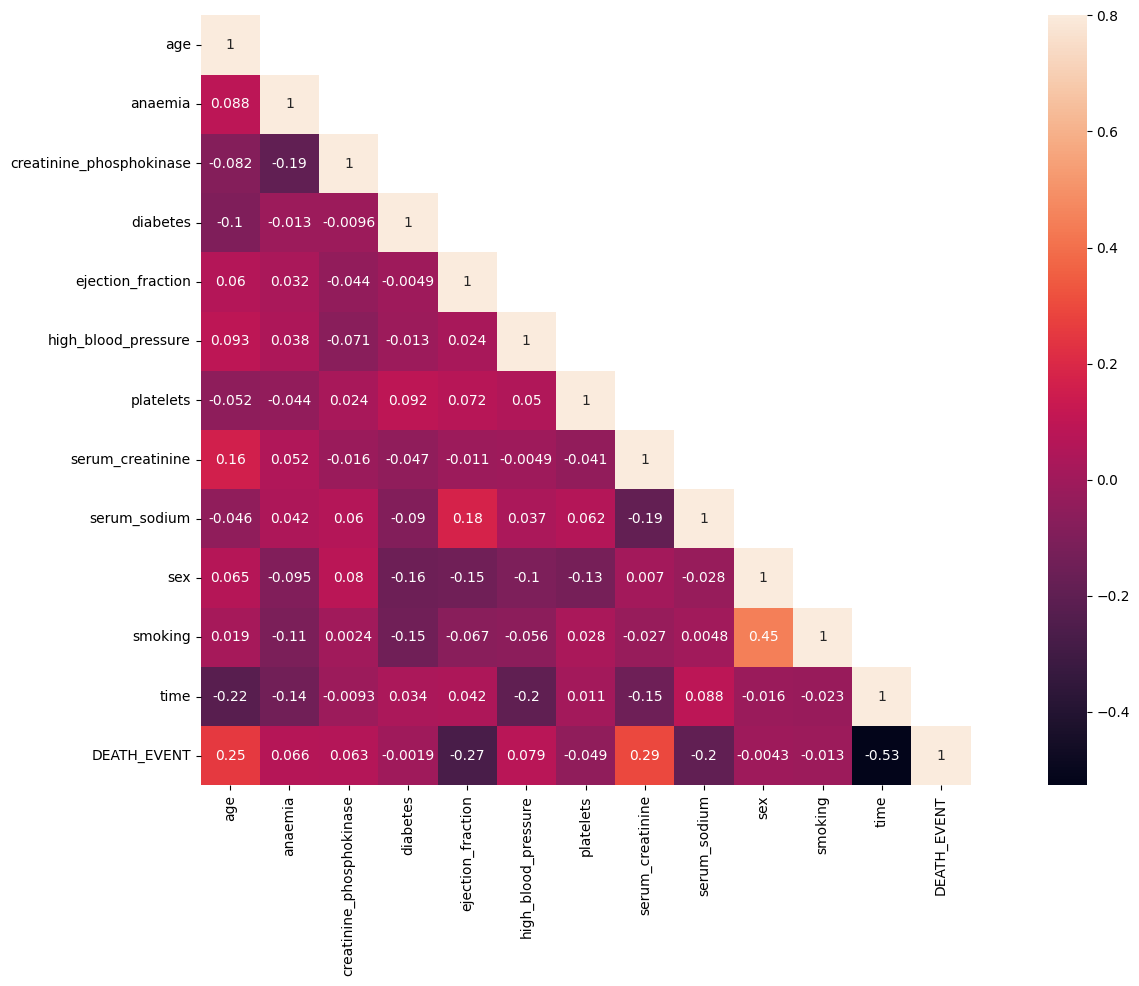

In [9]:
# Correlation analysis (Heat Map)
corrMatt = data_0.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

**Firstly we will split the inputs and the output. where the output is:”Death_event” column**

In [10]:
#input
data_1 = data_0.drop('DEATH_EVENT', axis=1)
data_1 = np.array(data_1, dtype=int)
#output
target_1 = data_0['DEATH_EVENT']
target_1 = np.array(target_1, dtype=int)

**Split the data to train and test where: 80% for Training & 20% for Testing.**

In [11]:
#Calling some extra libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [12]:
# splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(data_1, target_1, test_size=0.2, random_state=4)

In [13]:
#Normalize Dataset
x_train = normalize(x_train)
x_test = normalize(x_test)

**Applying K Nearest Neighbour**

In [14]:
# I will start the algorithm with k=4 for now:
k = 4
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh
# use the model to make predictions on the test set
yhat = neigh.predict(x_test)
yhat[0:5]
# Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8158995815899581
Test set Accuracy:  0.75


In [15]:
#Checking the accuracy of k=5
k = 5
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
yhat6 = neigh6.predict(x_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.799163179916318
Test set Accuracy:  0.7833333333333333


In [16]:
features = [feature for feature in data_0.columns if feature != 'DEATH_EVENT']
features

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time']

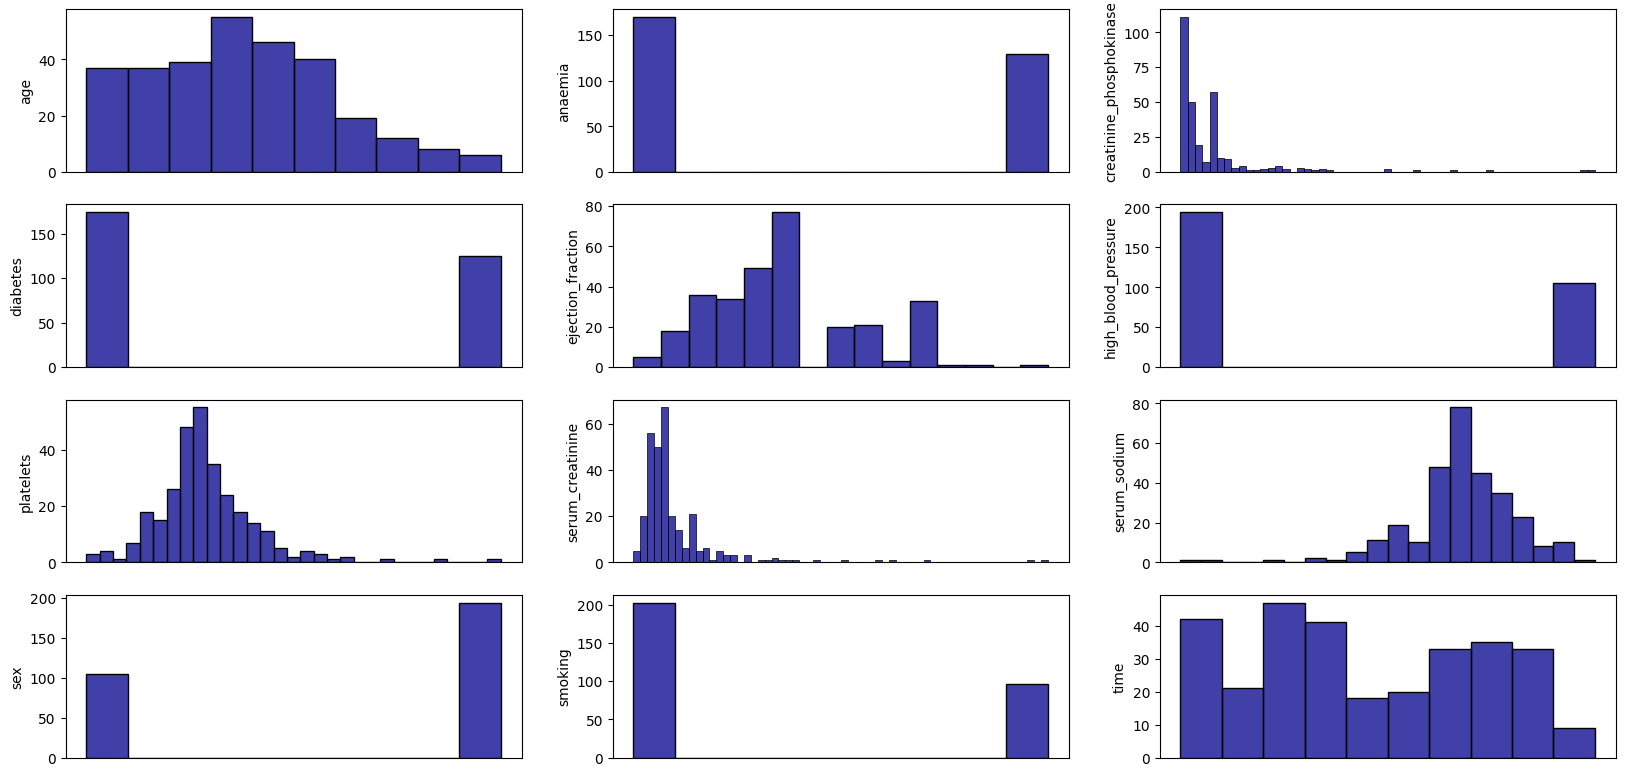

In [17]:
plt.figure(figsize=(20, 30))
for ind, feature in enumerate(features):
    plt.subplot(12, 3, ind * 1 + 1)
    plt.ylabel(feature)
    sub_plot = sns.histplot(data_0[feature], color='darkblue', kde_kws={'shade': True})
    sub_plot.set(xticklabels=[])
    sub_plot.set(xlabel=None)
    sub_plot.tick_params(bottom=False)
plt.show()

**KNN Result**

In [18]:
import itertools    
def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        import itertools
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [19]:
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[ 8 10]
 [ 3 39]]


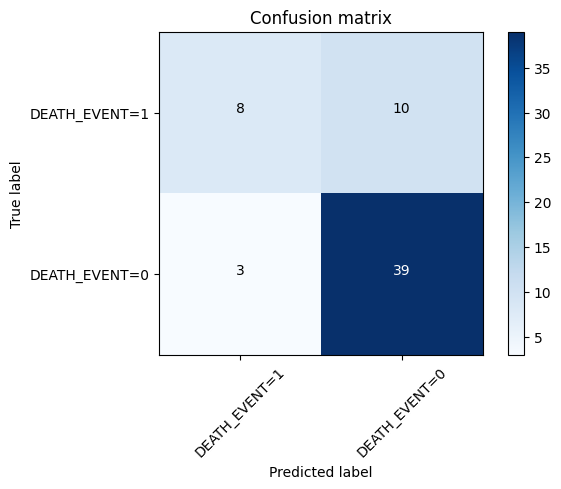

In [20]:
cnf_matrix = confusion_matrix(y_test, yhat6, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['DEATH_EVENT=1','DEATH_EVENT=0'],normalize= False,  title='Confusion matrix')

In [21]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat6))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        42
           1       0.73      0.44      0.55        18

    accuracy                           0.78        60
   macro avg       0.76      0.69      0.70        60
weighted avg       0.78      0.78      0.77        60

